<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/ComputerVision/Lecture%2002%20-%20Image%20Filtering/Lecture_02_Image_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
import os


In [ ]:
!rm *.png* *.zip*
!wget https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2002%20-%20Image%20Filtering/Images/Images.zip
!unzip Images.zip

--2022-08-09 18:38:18--  https://github.com/andrehochuli/teaching/raw/main/ComputerVision/Lecture%2002%20-%20Image%20Filtering/Images/Images.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2002%20-%20Image%20Filtering/Images/Images.zip [following]
--2022-08-09 18:38:19--  https://raw.githubusercontent.com/andrehochuli/teaching/main/ComputerVision/Lecture%2002%20-%20Image%20Filtering/Images/Images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2674218 (2.5M) [application/zip]
Saving to: ‘Images.zip’

Images.zip          100%[=============

In [ ]:
import glob
image_list = glob.glob('/content/*.png')
print(image_list)

['/content/VegetablesNoisy.png', '/content/VanGogh-Selfie.png', '/content/EinsteinNoisy.png', '/content/smarties.png', '/content/BrainNoisy.png', '/content/smarties2.png', '/content/LenaNoisy.png', '/content/VanGogh - Dinner.png', '/content/VanGogh-Sky.png']


In [ ]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)
  
  for i in range(n):  
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])

  # Combine all the operations and display
  plt.show()

#Image Filtering

Image filtering methods are used to smooth noises and enhance image quality.

Take a look at the code below.

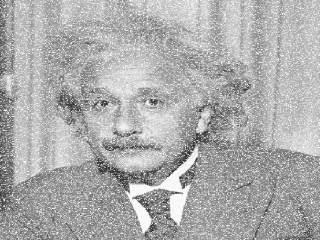

In [ ]:
im_einstein = cv2.imread('/content/EinsteinNoisy.png', cv2.IMREAD_COLOR)
im_einstein = cv2.resize(im_einstein,(320,240))
cv2_imshow(im_einstein)

#Is there a way to smooth the noise ?

Yes! We can use some filters. 

In this class, we will approach:
*   Convolution
*   Mean Filter (cv2.blur)
*   Median Filter (cv2.medianBlur)
*   Gaussian Filter (cv2.GaussianBlur)
*   Bilateral Filter (cv2.bilateralFilter)


#Before we start, do you know what convolution means?

 Convolution is the process of sliding a kernel (a.k.a convolution filter) in the entire image, transforming the pixel in the center of the kernel by the weights of its neighbors.

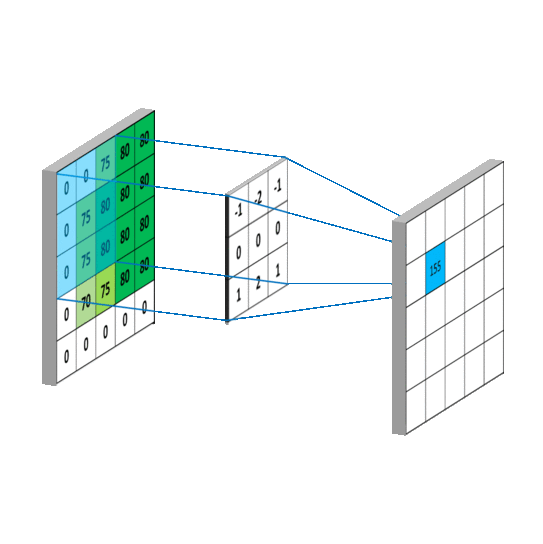




# Mean Filter (cv2.blur)
* Replaces the center pixel with the mean of its neighborhood
* Spreads the outlier value to its neighbors
* Details are smoothed 



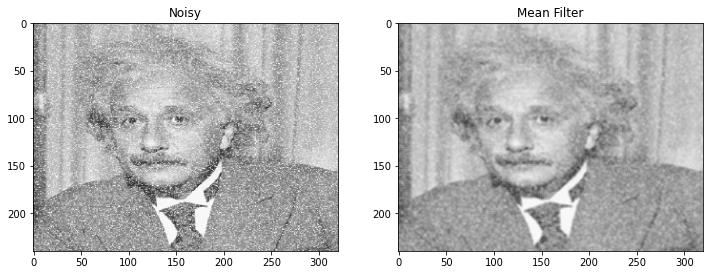

In [ ]:
kernel_size = (3,3)
im_blur = cv2.blur(im_einstein,kernel_size)
plot_sidebyside([im_einstein,im_blur],['Noisy','Mean Filter'],colormap='gray')

#Median Filter (cv2.blur)

*   Replaces the center pixel with by a median of its neighborhood
*   Preserves more details when compared to the mean filter

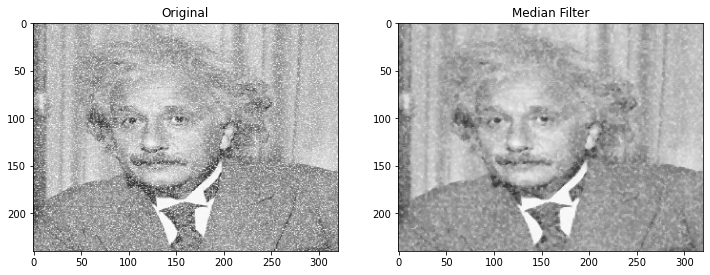

In [ ]:
im_blur = cv2.medianBlur(im_einstein,3)
plot_sidebyside([im_einstein,im_blur],['Noisy','Median Filter'],colormap='gray')

#Gaussian Filter (cv2.GaussianBlur())
* Gaussian distribution of pixels
* The kernel is composed of probabilities
* Weighted Mean
* The standard deviation determines the blur degree

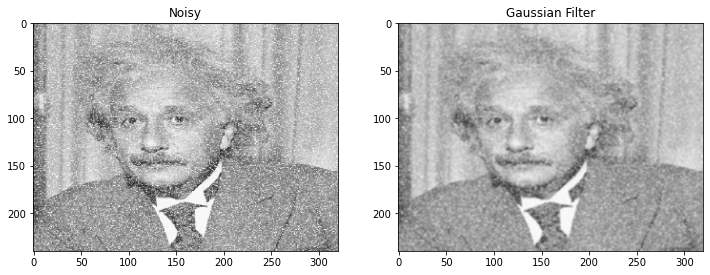

In [ ]:
im_blur = cv2.GaussianBlur(im_einstein,(3,3),0)
plot_sidebyside([im_einstein,im_blur],['Noisy','Gaussian Filter'],colormap='gray')

#Bi-Lateral
* Gaussian Distribution based
* Add Normalization Factors and Range Weight
* Preserve details

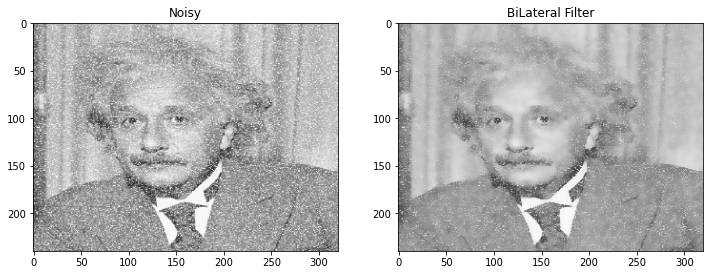

In [ ]:
# Apply bilateral filter with d = 15,
# sigmaColor = sigmaSpace = 75.
im_blur = cv2.bilateralFilter(im_einstein,9,75,75)
plot_sidebyside([im_einstein,im_blur],['Noisy','BiLateral Filter'],colormap='gray')

Now, it´s up to you!

Let try some of these filters with other images, change the parameters, etc
Then, try to segment by threshold function, color, etc.

How does the noise impact it?

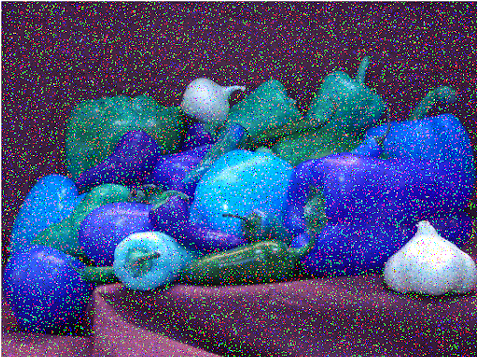

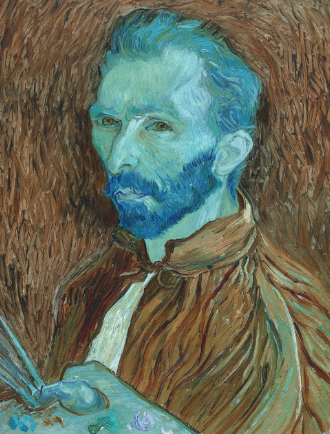

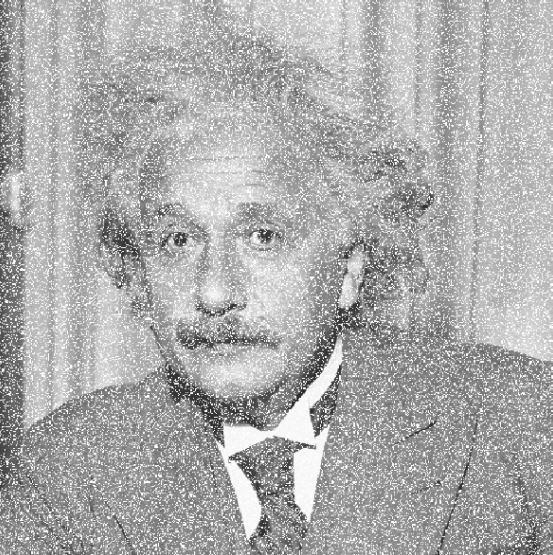

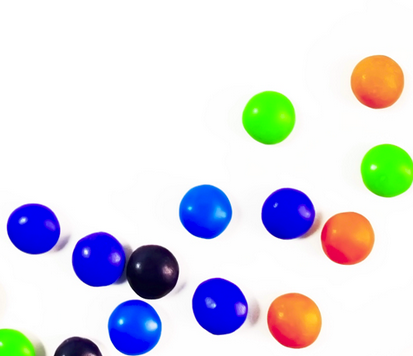

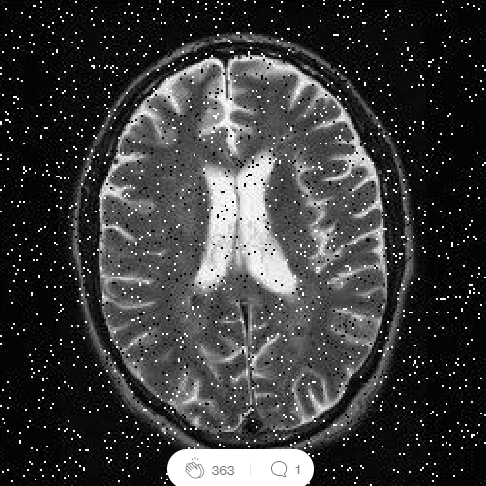

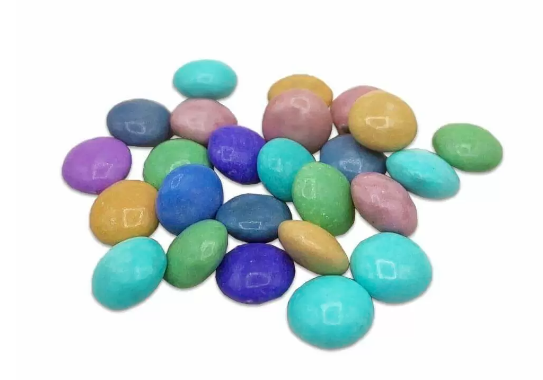

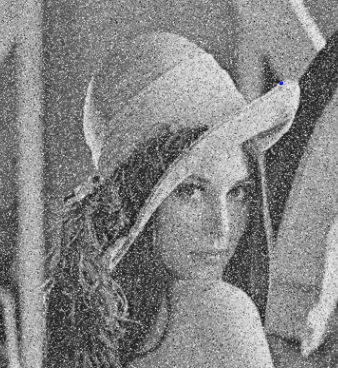

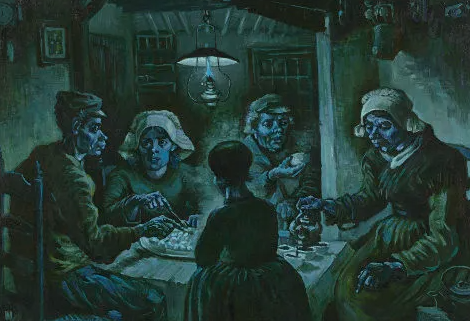

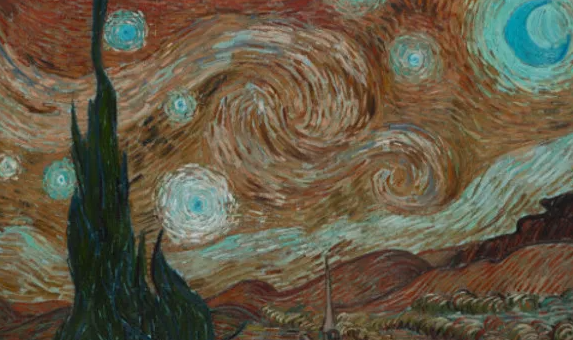

In [ ]:
for im_name in image_list:
  im = cv2.imread(im_name)
  im = cv2.cvtColor(im,cv2.COLOR_RGB2BGR)
  cv2_imshow(im)